<a href="https://colab.research.google.com/github/choejeongsik/postec-deep-learning-study/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression


Sovle using linear algebra

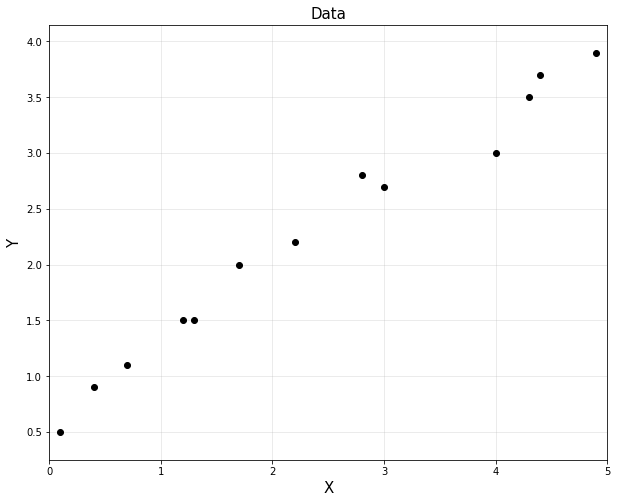

In [18]:
import numpy as np
import matplotlib.pyplot as plt

#data point column vector
x = np.array([0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]).reshape(-1,1) #-1은 원래 행렬의 요소 개수를 모른다고 가정하고 설정한 것, reshape의 하나가 결정되면 자동으로 나머지가 결정
y = np.array([0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.9]).reshape(-1,1)

plt.figure(figsize=(10,8))
plt.plot(x,y,'ko')
plt.title('Data', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.axis('equal')
plt.grid(alpha=0.3)
plt.xlim([0,5])
plt.show()


In [19]:
m = y.shape[0]

A=np.hstack([x**0, x])
A=np.asmatrix(A)

theta = (A.T*A).I*A.T*y

print('theta:\n', theta)

theta:
 [[0.65306531]
 [0.67129519]]


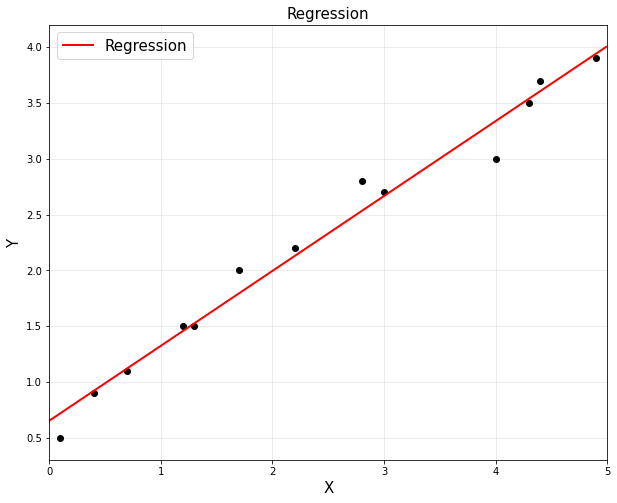

In [20]:
plt.figure(figsize=(10,8))
plt.title('Regression', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.plot(x,y,'ko')

xp=np.arange(0, 5, 0.01).reshape(-1,1)
yp=theta[0,0]+theta[1,0]*xp

plt.plot(xp,yp, 'r', linewidth=2, label='Regression')
plt.legend(fontsize=15)
plt.axis('equal')
plt.grid(alpha=0.3)
plt.xlim([0, 5])
plt.show()

Scikit-Learn

In [21]:
from sklearn import linear_model

In [22]:
reg=linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

In [23]:
reg.coef_

array([[0.67129519]])

In [24]:
reg.intercept_

array([0.65306531])

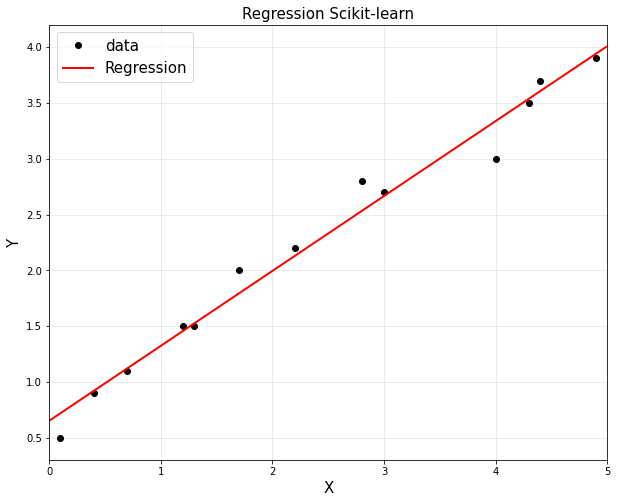

In [25]:
#to plot
plt.figure(figsize=(10,8))
plt.title('Regression Scikit-learn', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.plot(x,y,'ko', label='data')

#to plot straight line
plt.plot(xp, reg.predict(xp), 'r', linewidth=2, label='Regression')
plt.legend(fontsize=15)
plt.axis('equal')
plt.grid(alpha=0.3)
plt.xlim([0,5])
plt.show()

# Classification: Perceptron

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
#training data generation
m=100
x1=8*np.random.rand(m,1)
x2=7*np.random.rand(m,1)-4

g=0.8*x1+x2-3

In [71]:
C1=np.where(g>=1) #np.where = 조건에 맞는 인덱스 출력
C0=np.where(g<-1)
print(C1)
print(C0)

(array([ 1,  3,  4,  9, 11, 16, 22, 24, 25, 28, 29, 31, 32, 43, 44, 47, 48,
       51, 53, 55, 58, 61, 63, 64, 67, 71, 75, 81, 85, 92, 96, 98]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
(array([ 2,  5, 13, 14, 15, 19, 21, 27, 30, 36, 37, 38, 39, 40, 45, 46, 49,
       50, 54, 57, 59, 62, 65, 66, 70, 72, 74, 76, 80, 83, 86, 87, 89, 90,
       91, 94, 95, 99]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


In [72]:
C1=np.where(g>=1)[0]
C0=np.where(g<-1)[0]
print(C1.shape)
print(C0.shape)

(32,)
(38,)


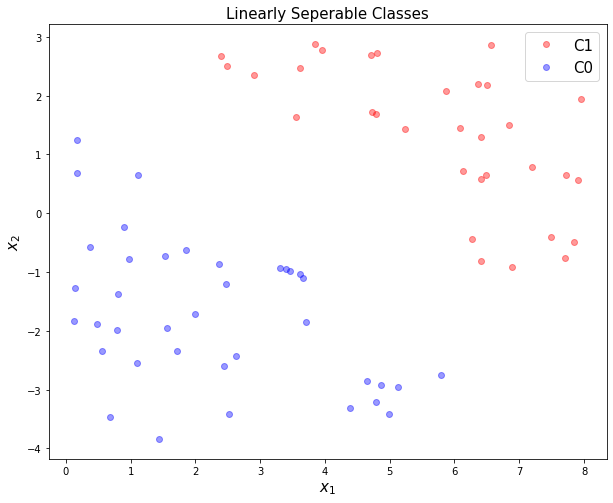

In [73]:
plt.figure(figsize=(10,8))
plt.plot(x1[C1], x2[C1], 'ro', alpha=0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha=0.4, label = 'C0')
plt.title('Linearly Seperable Classes', fontsize=15)
plt.legend(loc=1, fontsize=15)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)
plt.show()

In [74]:
X1 = np.hstack([np.ones([C1.shape[0],1]), x1[C1], x2[C1]])
X0 = np.hstack([np.ones([C0.shape[0],1]), x1[C0], x2[C0]])
X = np.vstack([X1, X0])

y = np.vstack([np.ones([C1.shape[0],1]), -np.ones([C0.shape[0],1])])

X = np.asmatrix(X)
y = np.asmatrix(y)


In [75]:
w = np.ones([3,1])
w = np.asmatrix(w)

n_iter = y.shape[0]
flag = 0

while flag == 0:
  flag=1
  for i in range(n_iter):
    if y[i,0] != np.sign(X[i,:]*w)[0,0]:
      w=w+y[i,0]*X[i,:].T
      flag = 0
print(w)


[[-11.        ]
 [  2.66002477]
 [  7.14800398]]


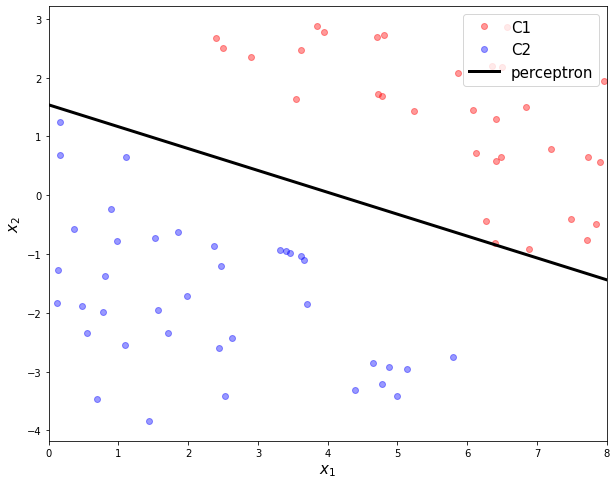

In [76]:
x1p=np.linspace(0,8,100).reshape(-1,1)
x2p=-w[1,0]/w[2,0]*x1p-w[0,0]/w[2,0]

plt.figure(figsize=(10,8))
plt.plot(x1[C1], x2[C1], 'ro', alpha=0.4, label='C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha=0.4, label='C2')
plt.plot(x1p, x2p, c='k', linewidth=3, label='perceptron')
plt.xlim([0, 8])
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.show()

Perceptron using Scikit-Learn

In [ ]:
X1=np.hstack([x1[C1], x2[C1]])
X0=np.hstack([x1[C0], x2[C0]])
X=np.vstack([X1, X0])

y=np.vstack([np.ones([C1.shape[0], 1]), -np.ones([C0.shape[0],1])])


In [84]:
from sklearn import linear_model

clf=linear_model.Perceptron(tol=1e-3)
clf.fit(X, np.ravel(y))

Perceptron()

In [85]:
clf.predict([[3,-2]])

array([-1.])

In [86]:
clf.coef_

array([[5.14658562, 7.83985287]])

In [87]:
clf.intercept_

array([-12.])

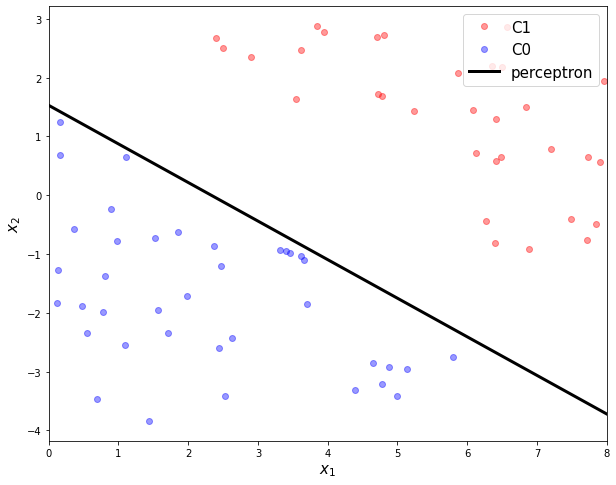

In [90]:
w0=clf.intercept_[0]
w1=clf.coef_[0,0]
w2=clf.coef_[0,1]

x1p=np.linspace(0,8,100)
x2p=-w1/w2*x1p-w0/w2

plt.figure(figsize=(10,8))
plt.plot(x1[C1], x2[C1], 'ro', alpha=0.4, label='C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha=0.4, label='C0')
plt.plot(x1p, x2p, c='k', linewidth=3, label='perceptron')
plt.xlim([0,8])
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.show()


# Logistic Regression

sigmoid function

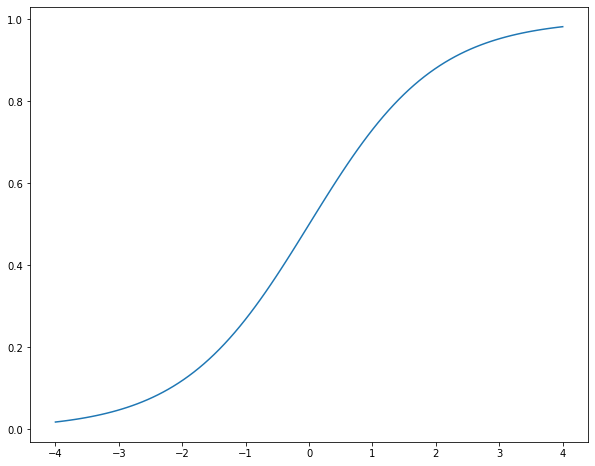

In [93]:
# plot a sigmoid function

import numpy as np
import matplotlib.pyplot as plt

z=np.linspace(-4,4,100)
s=1/(1+np.exp(-z))

plt.figure(figsize=(10,8))
plt.plot(z, s)


Logistic Regression using Scikit-Learn

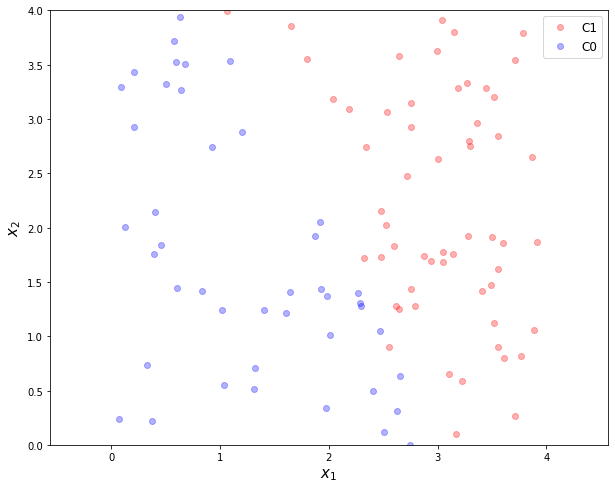

In [95]:
#data generation

m=100
w0=-6
w=np.array([[2],[1]])
X=np.hstack([4*np.random.rand(m,1), 4*np.random.rand(m,1)])

w=np.asmatrix(w)
X=np.asmatrix(X)

y=1/(1+np.exp(-w0-X*w))>0.5

C1=np.where(y==True)[0]
C0=np.where(y==False)[0]

y=np.empty([m,1])
y[C1]=1
y[C0]=0

plt.figure(figsize = (10,8))
plt.plot(X[C1,0], X[C1,1], 'ro', alpha = 0.3, label = 'C1')
plt.plot(X[C0,0], X[C0,1], 'bo', alpha = 0.3, label = 'C0')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()

In [96]:
X.shape

(100, 2)

In [98]:
from sklearn import linear_model

clf=linear_model.LogisticRegression(solver='lbfgs')
clf.fit(X, np.ravel(y))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


LogisticRegression()

In [99]:
clf.coef_

array([[3.23832732, 1.56485634]])

In [100]:
clf.intercept_

array([-9.84209449])

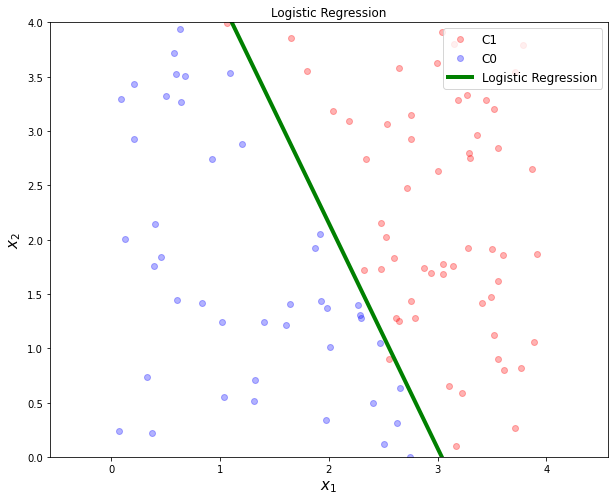

In [102]:
w0 = clf.intercept_[0]
w1 = clf.coef_[0,0]
w2 = clf.coef_[0,1]

xp = np.linspace(0,4,100).reshape(-1,1)
yp = - w1/w2*xp - w0/w2

plt.figure(figsize = (10,8))
plt.plot(X[C1,0], X[C1,1], 'ro', alpha = 0.3, label = 'C1')
plt.plot(X[C0,0], X[C0,1], 'bo', alpha = 0.3, label = 'C0')
plt.plot(xp, yp, 'g', linewidth = 4, label = 'Logistic Regression')
plt.title('Logistic Regression')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0,4])
plt.ylim([0,4])
plt.show()